# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
# Importando as bibliotecas que serão utilizadas.
# numpy e pandas para analisar os dados.
# seaborn e matplotlib para visualização dos dados.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
%matplotlib inline

In [2]:
# Importando os dados para o ambiente de trabalho.

df = pd.read_csv('/content/Profissao- Cientista de Dados_M10_support material.csv')

In [3]:
# Visualisando as primeiras linhas do banco de dados.

df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [4]:
# Com o info eu consigo visualizar a quantidade de dados de cada variável e o tipo de dado.
# A única variável que apresenta dados faltantes é o tempo_emprego.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [5]:
# Na base de dados existem 2.534 dados faltantes de tempo de emprego, que representam 16,9% da base de dados. Não é um valor elevado mas já é um volume considerável.

df.tempo_emprego.isna().sum()

2534

In [6]:
2534/15000

0.16893333333333332

In [7]:
# Nesta primeira análise não será utilizado as variáveis object, nem index, nem Unanamed:0, nem mau.

df_01 = df[['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]

In [8]:
# Usando o corr() é possivel criar uma matriz de correlação das variáveis.

df_01.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,1.000000


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


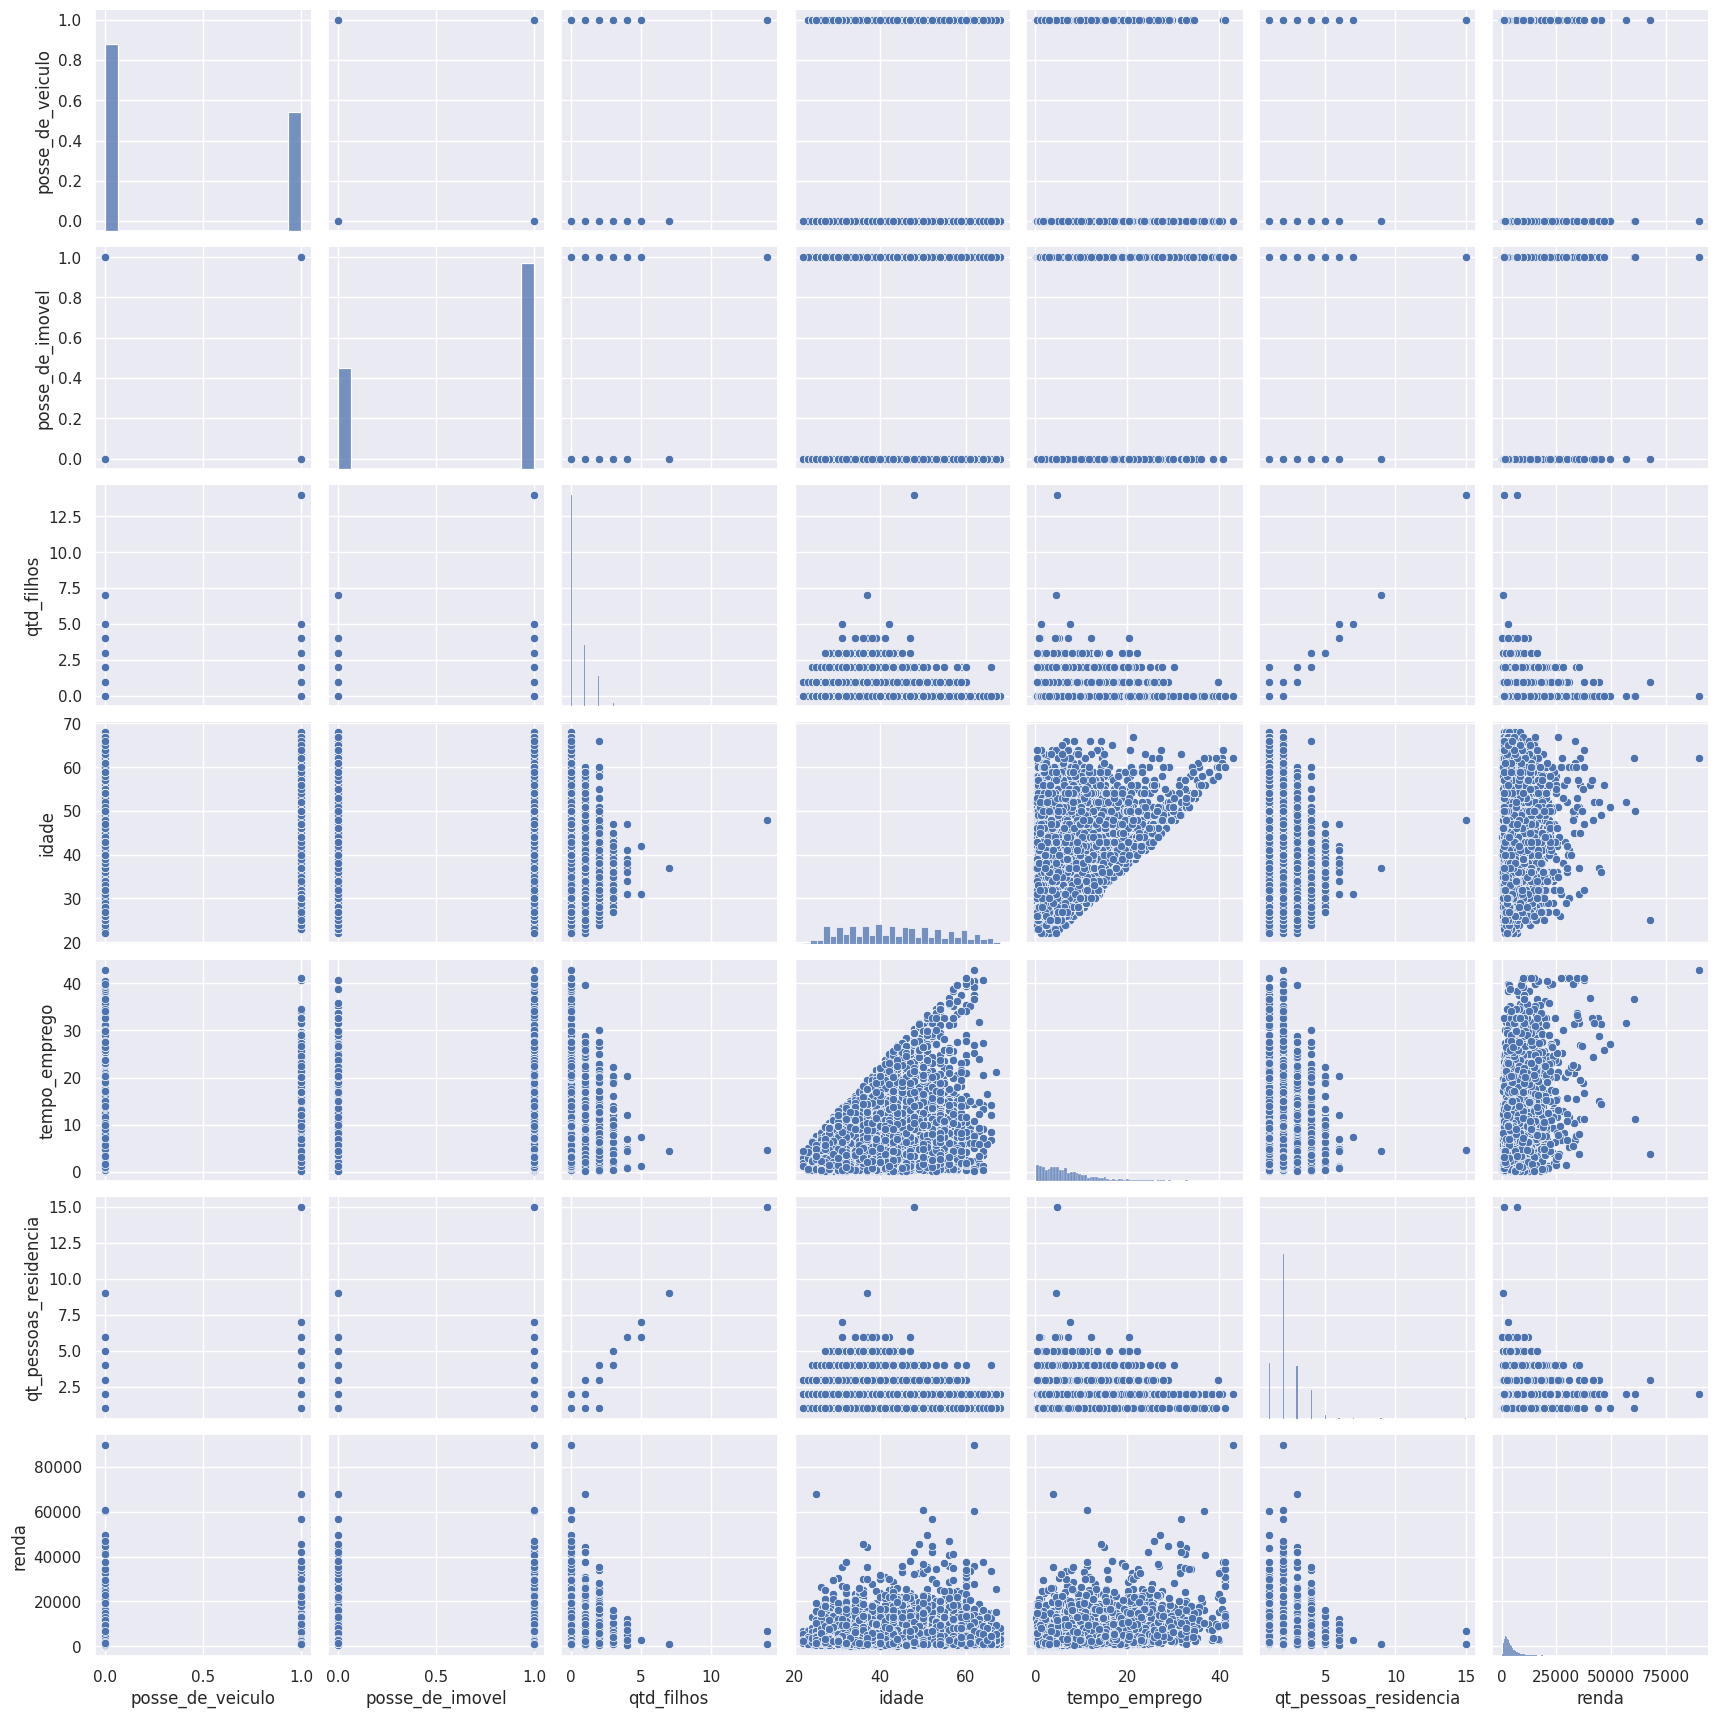

In [9]:
# Usando o sns.pairplot() é possível verificar essas correlações de forma gráfica.

sns.pairplot(df_01).figsize=[15,10]

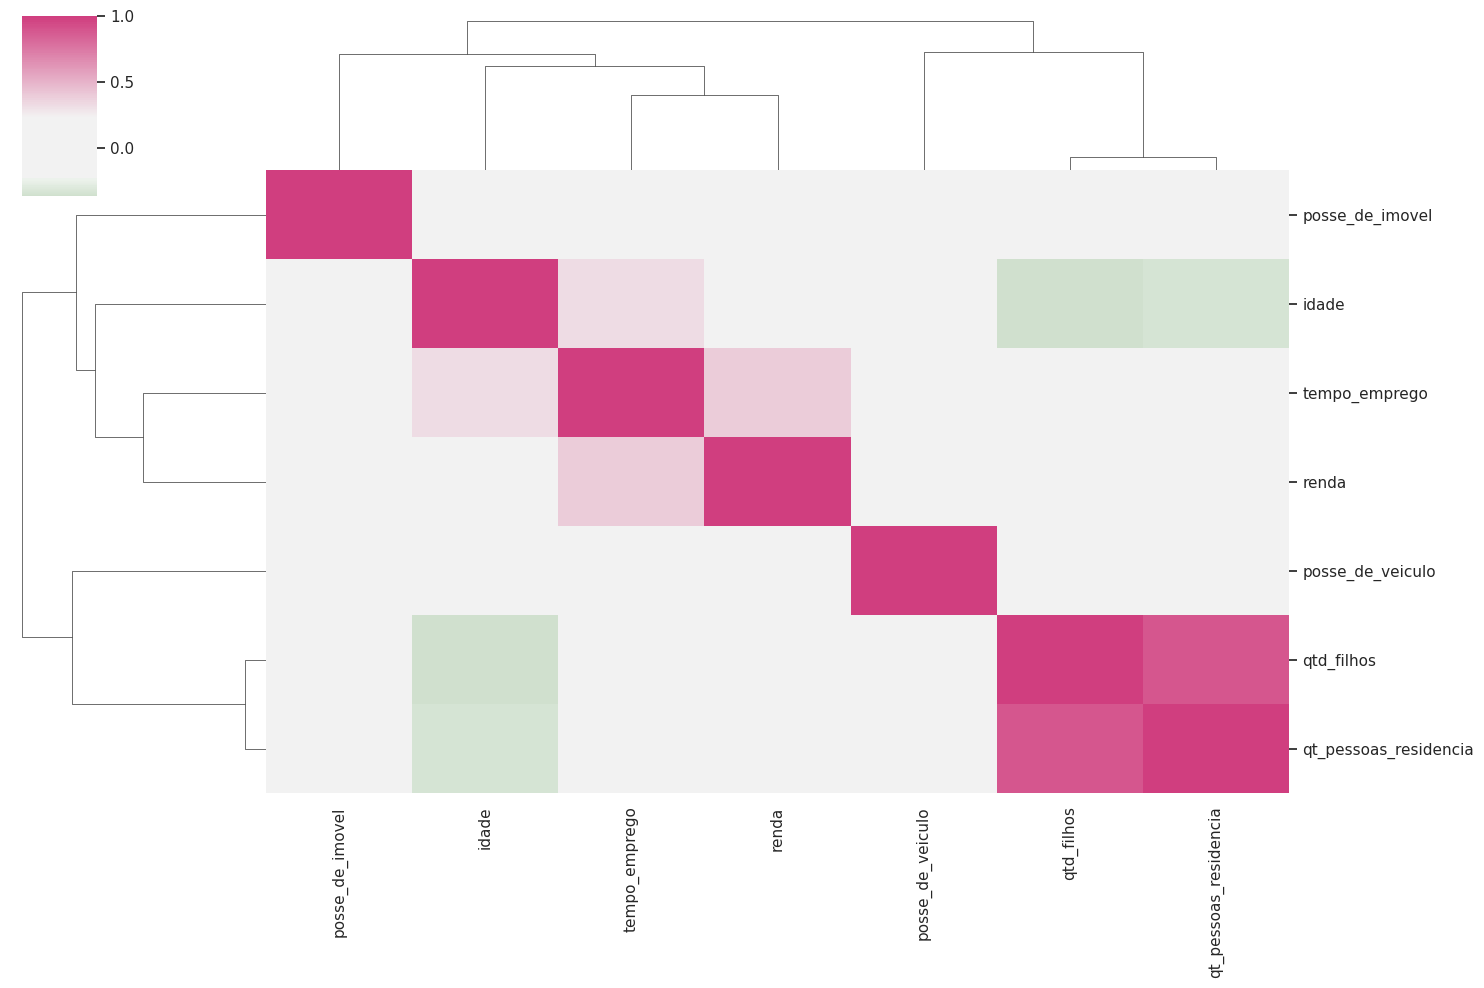

In [10]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=60, center='light')
sns.clustermap(df_01.corr(), figsize=[15,10], center=0, cmap=cmap)

#### Análise:

A **posse_veículo** não apresenta uma boa correlação com as demais variáveis, pois grande parte de seus valores está próxima de zero.\
O mesmo pode ser verificado com a **posse_imovel**.\
O pairplot() apresenta uma visualização dos dados mais bagunçada.
Já com o corr() e com o clustermap() a visualização e entendimento da relação dos dados é mais intuitiva.

A idade apresenta uma correlação negativa com a quantidade de filhos e com a quantidade de pessoas residencia. Por outro lado, a idade apresenta uma boa correlação com o tempo de emprego, o que faz muito sentido, pessoas mais velhas geralmente terão um tempo maior de emprego.

Tempo de emprego tem uma maior correlação com a renda.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='renda'>

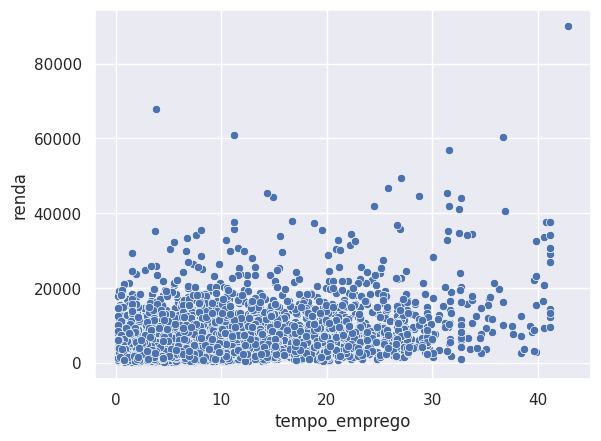

In [11]:
# A partir da análise realizada acima a variável que possui maior correlação com a renda é o tempo de emprego, a próxima variável é a posse_de_veiculo, mas esta correlação já é bem menor.

sns.scatterplot(data=df, x='tempo_emprego', y='renda')

<Axes: xlabel='posse_de_veiculo', ylabel='renda'>

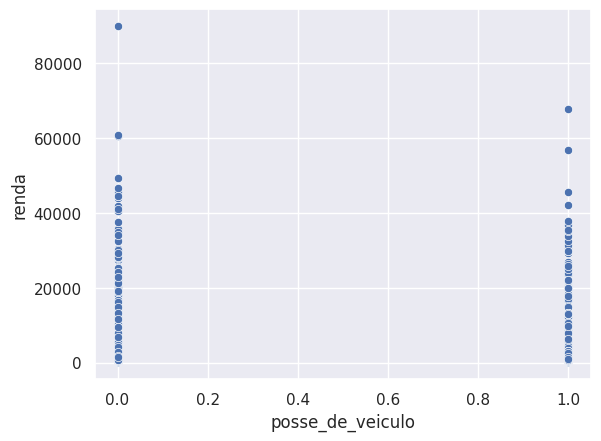

In [12]:
sns.scatterplot(data=df_01, x='posse_de_veiculo', y='renda')

<Axes: xlabel='tempo_emprego', ylabel='renda'>

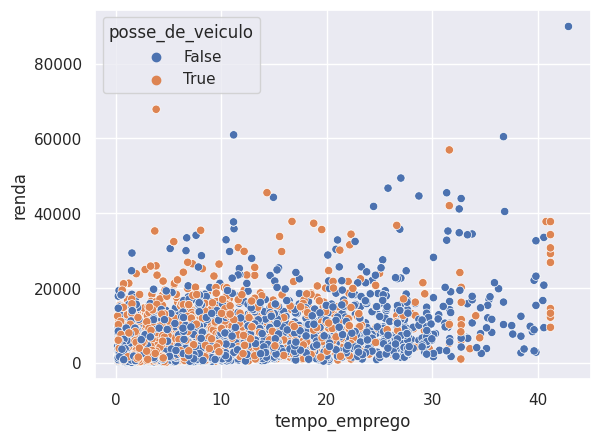

In [13]:
sns.scatterplot(data=df, x='tempo_emprego', y='renda', hue='posse_de_veiculo')

#### Análise:

Verificando o primeiro gráfico de tempo_de_emprego pela renda verifica-se uma maior densidade de dados perto da origem, ou seja, no inicio da carreira espera-se que as pessoa ganhem menos, e sua renda aumente com o decorrer do tempo de carreira.

É interessante observar que na média com o decorrer do tempo o valor da renda continua o praticamente o mesmo.

No gráfico de dispersão da posse_de_veiculo pela renda não se pode tirar nenhum insight. Contudo, se analisarmos todas as variáveis em conjunto, verifica-se que ela também está mais presente perto da origem.

3) Na su aopinião, há outliers na variável renda?

In [14]:
df.renda.mean()

4624.632946

In [15]:
df.renda.std()

4628.571729203342

#### Resposta:

Ao meu ver existem outliers, como por exemplo os dados que estão com renda acima de 60.000, esses valores se distanciam muito da média. Isso pode ser verificado pelo desvio padrão, que é da mesma ordem de grandeza que a média.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [16]:
df_log = df_01.copy()
df_log['renda_log'] = np.log(df_log['renda'])

In [17]:
df_log

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,renda_log
0,False,True,1,36,3.575342,3.0,3369.24,8.122442
1,True,True,0,42,0.860274,2.0,6096.14,8.715411
2,True,True,2,31,8.065753,4.0,5658.98,8.640999
3,True,False,0,50,1.208219,2.0,7246.69,8.888300
4,False,False,0,52,13.873973,2.0,4017.37,8.298383
...,...,...,...,...,...,...,...,...
14995,True,True,1,37,2.046575,3.0,1193.29,7.084469
14996,True,True,1,30,12.079452,3.0,2519.18,7.831689
14997,True,True,0,40,2.161644,2.0,1586.85,7.369506
14998,False,True,0,47,3.295890,2.0,6975.39,8.850144


<Axes: xlabel='tempo_emprego', ylabel='renda_log'>

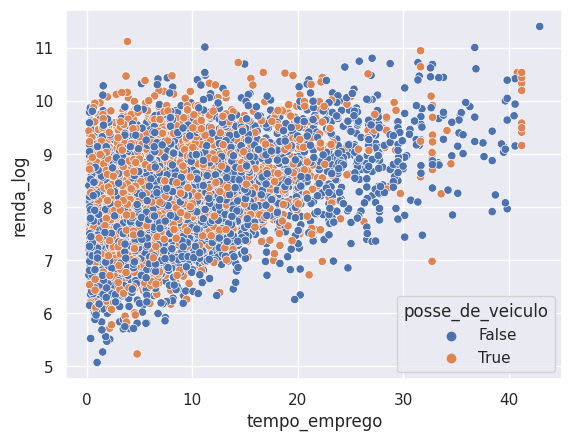

In [18]:
sns.scatterplot(x='tempo_emprego', y='renda_log', data=df_log, hue='posse_de_veiculo')

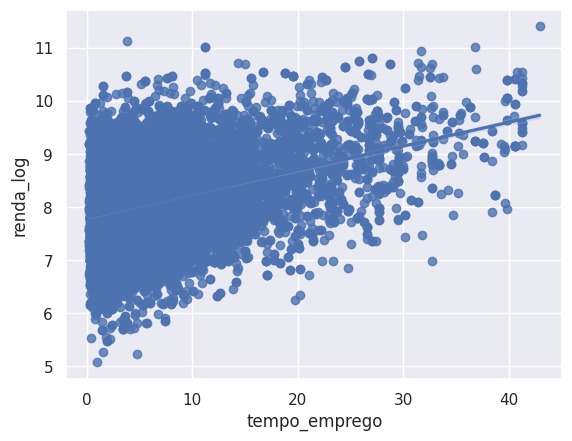

In [20]:
sns.regplot(x='tempo_emprego', y='renda_log', data=df_log)

#### Análise:

Analisando o novo gráfico, verifica-se que os continuam bem dispersos. A dispersão é identificada principalmente nos menores tempos de emprego. Com o passar do tempo a dispersão parece diminuir.

Outra análise que pode ser realizada é na tendência positiva entre o tempo de emprego e a renda, em que com o passar do tempo de emprego a renda tende a aumentar.

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A aplicação do log melhorou a análise, pois ela apresentou os resultados sobre outra perspectiva, auxiliando na análise dos dados.